In [94]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from scipy.optimize import least_squares
from scipy.ndimage import gaussian_filter

In [95]:
cmat = [10, 25, 50, 60, 70, 75, 85, 90, 100]
print(cmat)
recalculate = False

[10, 25, 50, 60, 70, 75, 85, 90, 100]


In [96]:
if recalculate:

    for c in cmat:
        print(c)
        u = np.loadtxt('coarse_grained_framesc'+str(c)+'/u'+str(500)+'.dat')*0
        v = np.loadtxt('coarse_grained_framesc'+str(c)+'/v'+str(500)+'.dat')*0
        rho = np.loadtxt('coarse_grained_framesc'+str(c)+'/rho'+str(500)+'.dat')*0


        for i in range(500,3500):
            u += np.loadtxt('coarse_grained_framesc'+str(c)+'/u'+str(i)+'.dat')
            v += np.loadtxt('coarse_grained_framesc'+str(c)+'/v'+str(i)+'.dat')
            rho += np.loadtxt('coarse_grained_framesc'+str(c)+'/rho'+str(i)+'.dat')

        np.savetxt('ubarc'+str(c)+'.dat',u*0.000185/3000)
        np.savetxt('vbarc'+str(c)+'.dat',v*0.000185/3000)
        np.savetxt('rhobarc'+str(c)+'.dat',rho/3000)


In [97]:
#loading velocity and density fields:
pixel2real = 0.0001848337
c = 100
xxcg,zzcg = np.meshgrid(np.arange(0,1000,10.0),np.arange(0,1000,10.0))
#Xu = xxcg.flatten()
#Zu = zzcg.flatten()
zzcg *= -pixel2real
xxcg *= pixel2real

u = np.loadtxt('ubarc'+str(c)+'.dat')
rho = np.loadtxt('rhobarc'+str(c)+'.dat')

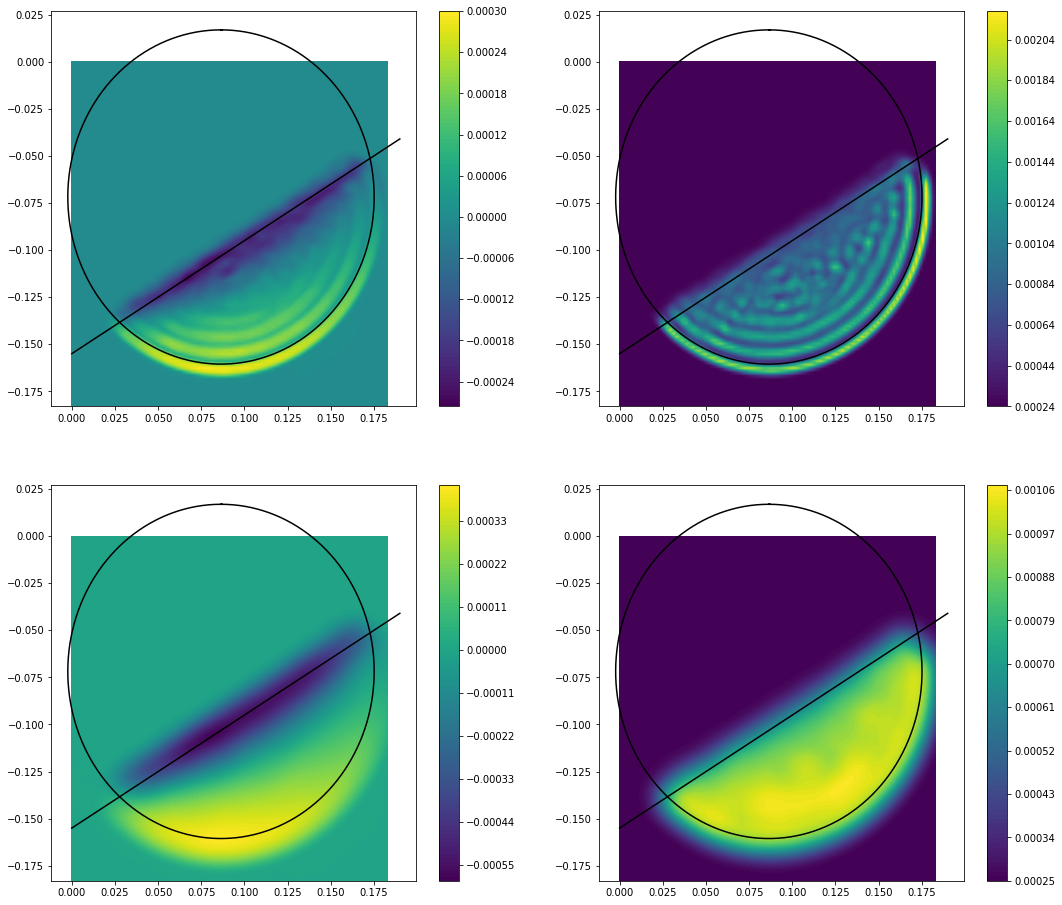

In [101]:
dt = 0.01
xc = 467.5*pixel2real
zc = 388.6*pixel2real
#r = 524.8*pixel2real #true radius
r = 480*pixel2real
theta = np.arange(0,2*3.14159+dt,dt)
xcircle = xc + r*np.sin(theta)
zcircle = -zc + r*np.cos(theta)
xline = np.arange(0,0.2,0.01)
m = 0.6
c = -0.155
yline = xline*m + c

c = 25
u = np.loadtxt('ubarc'+str(c)+'.dat')
rho = np.loadtxt('rhobarc'+str(c)+'.dat')
plt.figure(figsize=(18,16))
plt.subplot(2,2,1)
plt.contourf(xxcg,zzcg,u,levels=100)
plt.plot(xcircle,zcircle,'k')
plt.plot(xline,yline,'k')
plt.colorbar()
plt.subplot(2,2,2)
plt.contourf(xxcg,zzcg,rho,levels=100)
plt.plot(xcircle,zcircle,'k')
plt.plot(xline,yline,'k')
plt.colorbar()

c = 100
u = np.loadtxt('ubarc'+str(c)+'.dat')
rho = np.loadtxt('rhobarc'+str(c)+'.dat')
plt.subplot(2,2,3)
plt.contourf(xxcg,zzcg,u,levels=100)
plt.plot(xcircle,zcircle,'k')
plt.plot(xline,yline,'k')
plt.colorbar()
plt.subplot(2,2,4)
plt.contourf(xxcg,zzcg,rho,levels=100)
plt.plot(xcircle,zcircle,'k')
plt.plot(xline,yline,'k')
plt.colorbar()